<a href="https://colab.research.google.com/github/KaanYigitsoy13/Red_Wine_Quality_Insights_EDA/blob/main/Red_Wine_Quality_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background-color: #FF6961; padding: 10px; border-radius: 5px;">
    <span style="color: white; font-size: 28px; font-weight: bold;">1 | Introduction</span>
</div>


Context

The dataset encompasses information on both red and white variants of the Portuguese "Vinho Verde" wine. For further details, please refer to the study by Cortez et al., 2009. Due to confidentiality and logistical reasons, the dataset includes only physicochemical attributes (inputs) and sensory ratings (outputs), with no information on grape varieties, brand names, or selling prices of the wine.

The data can be approached as either a classification or regression problem. The quality ratings are ordinal and exhibit imbalance: normal wines are far more common than those rated as excellent or poor.

Additionally, this dataset is accessible via the UCI Machine Learning Repository at [https://archive.ics.uci.edu/ml/datasets/wine+quality]. It has been made available on Kaggle for ease of access.

Relevant publication

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

<div style="background-color: #FF6961; padding: 10px; border-radius: 5px;">
    <span style="color: white; font-size: 28px; font-weight: bold;">2 | Importing Libraries</span>

</div>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from IPython.display import display

<div style="background-color: #FF6961; padding: 10px; border-radius: 5px;">
    <span style="color: white; font-size: 28px; font-weight: bold;">3 | Reading the Data</span>

</div>


In [2]:
data_original = pd.read_csv('winequality-red.csv')

<div style="background-color: #FF6961; padding: 10px; border-radius: 5px;">
    <span style="color: white; font-size: 28px; font-weight: bold;">4 | Creating Color Palettes</span>
</div>


Color Palettes for Visualization : 


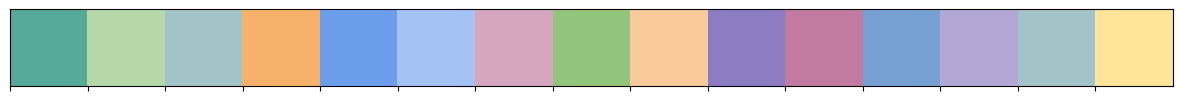

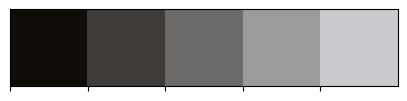

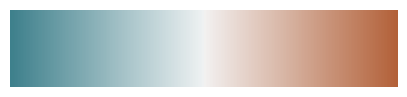

In [3]:
print('\033[93m\033[1m' + 'Color Palettes for Visualization : ' + '\033[0m')

# Custom color palette
color_palette = sns.color_palette(["#5A9", "#B6D7A8", "#A2C4C9",
                                   "#F6B26B", "#6D9EEB", "#A4C2F4",
                                   "#D5A6BD", "#93C47D", "#F9CB9C",
                                   "#8E7CC3", "#C27BA0", "#77A1D3",
                                   "#B4A7D6", "#A2C4C9","#FFE599",
                                   ])

sns.palplot(color_palette)
plt.show()

black_palette = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

sns.palplot(black_palette)
plt.show()

# Create the colormap
cmap = sns.diverging_palette(210, 28, as_cmap=True)

# Create a gradient of increasing values to visualize the colormap
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# Plot the colormap
plt.figure(figsize=(5,1))
plt.imshow(gradient, aspect='auto', cmap=cmap)
plt.axis('off')  # Hide the axis
plt.show()

<div style="background-color: #FF6961; padding: 10px; border-radius: 5px;">
    <span style="color: white; font-size: 28px; font-weight: bold;">5 | Data Exploration and Quality Assessment
</span>
</div>

<div style="background-color: #FF6961; padding: 10px; border-radius: 5px;">
    <span style="color: white; font-size: 28px; font-weight: bold;">5.1 | High Level Exploration
</span>
</div>

In [4]:
print('\033[93m\033[1m' + 'Data Frame Info : ' + '\033[0m')
data_original.info()

Data Frame Info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
print('\033[93m\033[1m' + 'First 5 Rows : ' + '\033[0m')

pd.set_option('display.max_columns', None)
data_original.head().style.background_gradient(cmap=cmap).set_properties(**{'font-family': 'Segoe UI', 'min-width': '75px'})

First 5 Rows : 


In [6]:
print('\033[93m\033[1m' + 'Last 5 Rows : ' + '\033[0m')

pd.set_option('display.max_columns', None)
data_original.tail().style.background_gradient(cmap=cmap).set_properties(**{'font-family': 'Segoe UI', 'min-width': '75px'})

Last 5 Rows : 


In [7]:
print('\033[93m\033[1m' + '10 Random Rows : ' + '\033[0m')

pd.set_option('display.max_columns', None)
data_original.sample(10).style.background_gradient(cmap=cmap).set_properties(**{'font-family': 'Segoe UI', 'min-width': '75px'})

10 Random Rows : 


In [8]:
# summary table function
pd.options.display.float_format = '{:,.2f}'.format
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df) * 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['average'] = desc['mean'].values
    summ['standard_deviation'] = desc['std'].values
    return summ

print('\033[93m\033[1m' + 'Summary Table: ' + '\033[0m')
summary(data_original).style.background_gradient(cmap=cmap)

Summary Table: 
data shape: (1599, 12)


Findings
- In the dataset, there are 12 columns with 1599 observations.
- No Null values observed.
- All columns are numerical.
- Some columns observed to be right skewed, there are potential outliers.
- 'density' column might not provide any useful information considering most values in this column are 1, further analysis will be conducted.

<div style="background-color: #FF6961; padding: 10px; border-radius: 5px;">
    <span style="color: white; font-size: 28px; font-weight: bold;">5.2 | Data Distributions
</span>
</div>

<div style="background-color: #FF6961; padding: 10px; border-radius: 5px;">
    <span style="color: white; font-size: 22px; font-weight: bold;">5.2.1 | Target Variable
</span>
</div>

 Data Distribution : quality


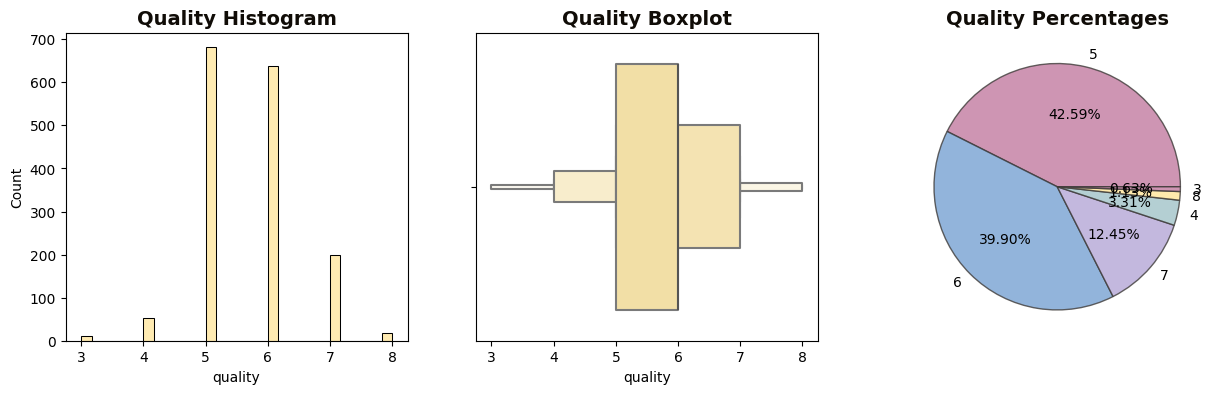

In [9]:
# Target Variable
print(f'\033[93m\033[1m Data Distribution : quality\033[0m')
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.title('Quality Histogram', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif',
            color = black_palette[0])
sns.histplot(data_original['quality'], color = color_palette[-1])

plt.subplot(1, 3, 2)
plt.title('Quality Boxplot', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif',
            color = black_palette[0])
sns.boxenplot(data=data_original, x='quality', color = color_palette[-1])

# Start the subplot
plt.subplot(1, 3, 3)
order = data_original['quality'].value_counts().index
plt.title('Quality Percentages', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_palette[0])

# Plot the pie chart
plt.pie(
    data_original['quality'].value_counts(),
    labels=order,
    wedgeprops=dict(alpha=0.8, edgecolor=black_palette[1]),
    colors=color_palette[10:],
    autopct='%.2f%%'  # This will display the percentage of each slice
)
plt.show()
print('\n')

# Show the plot
plt.show()

In [10]:
data_original['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Findings
- Most of the wines in the dataframe are between 5 - 7 quality scores. (94%)
- There is only a few wines ranked as 3, 4 or 8. (10, 53 and 18 entries)
  - We might conduct more in depth anaylsis to understand what makes a wine quality grade 8 as it is so rare.

<div style="background-color: #FF6961; padding: 10px; border-radius: 5px;">
    <span style="color: white; font-size: 22px; font-weight: bold;">5.2.2 | Feature Variables
</span>
</div>

 Data Distribution : fixed acidity


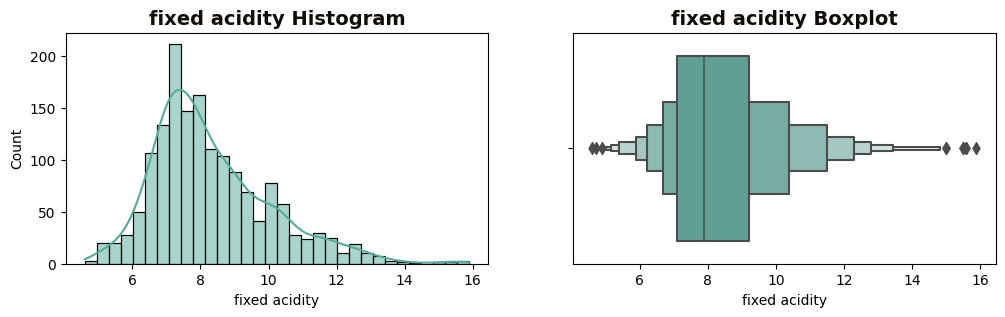



 Data Distribution : volatile acidity


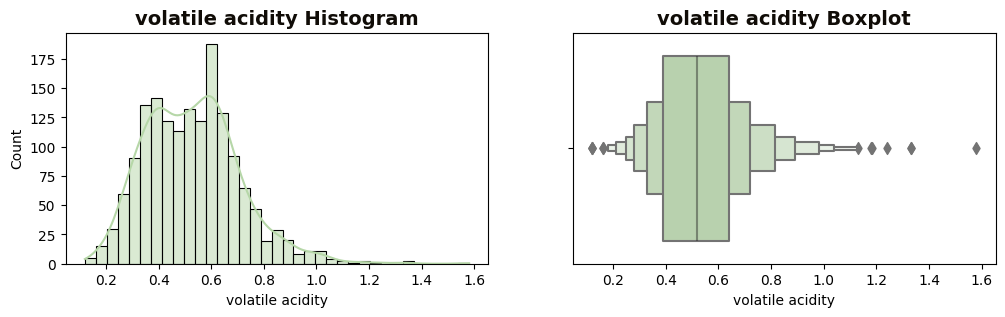



 Data Distribution : citric acid


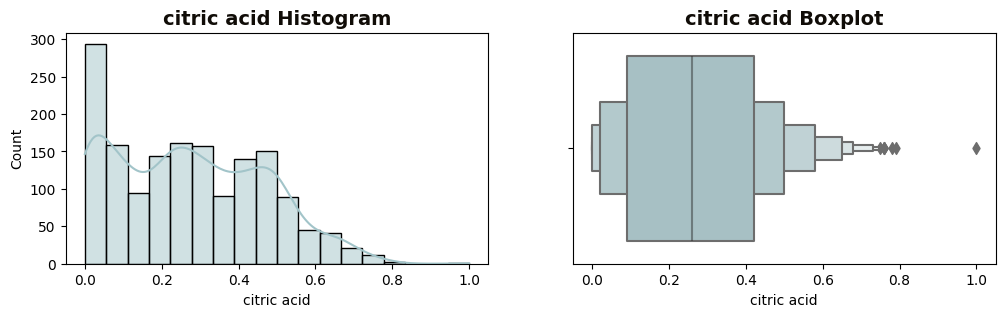



 Data Distribution : residual sugar


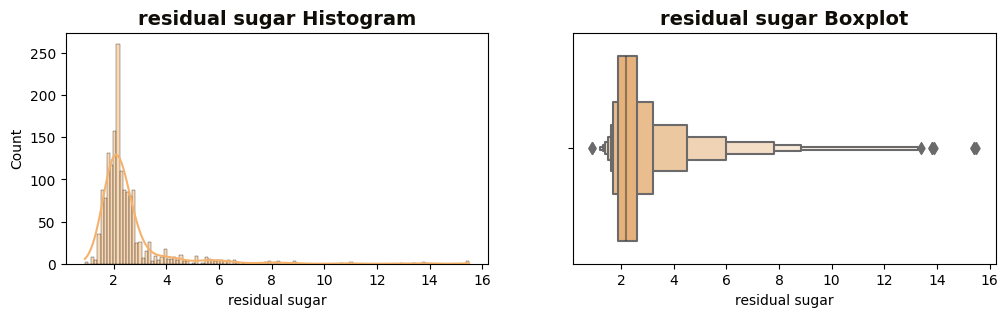



 Data Distribution : chlorides


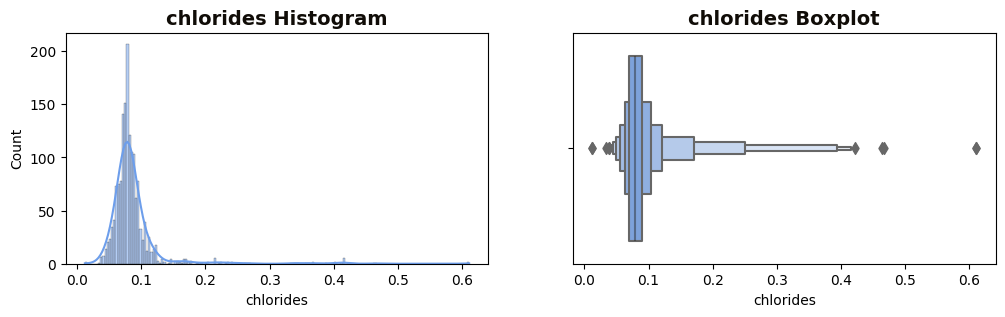



 Data Distribution : free sulfur dioxide


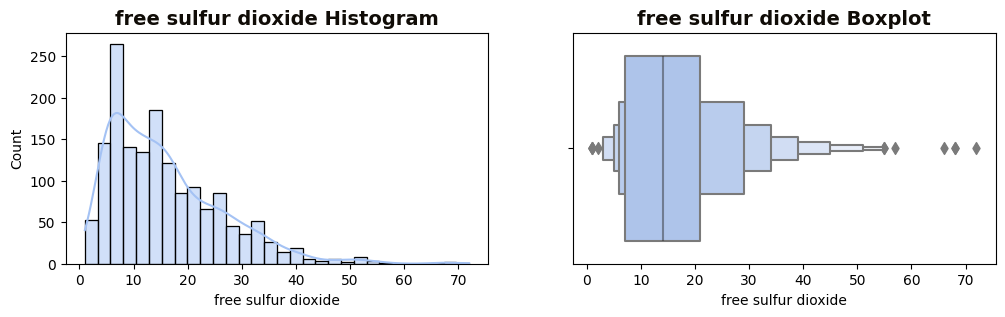



 Data Distribution : total sulfur dioxide


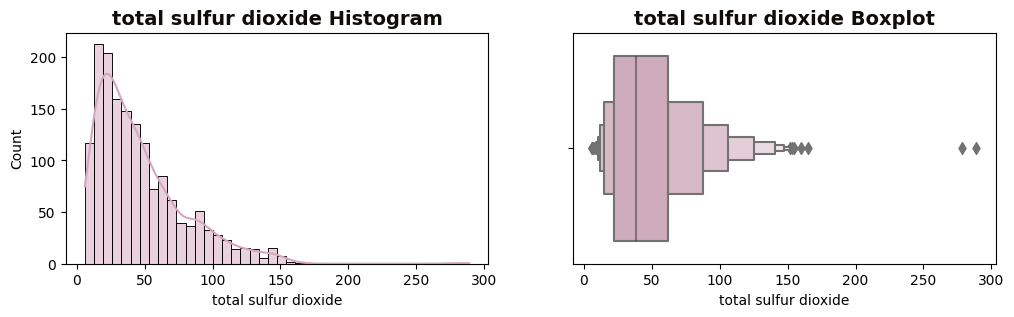



 Data Distribution : density


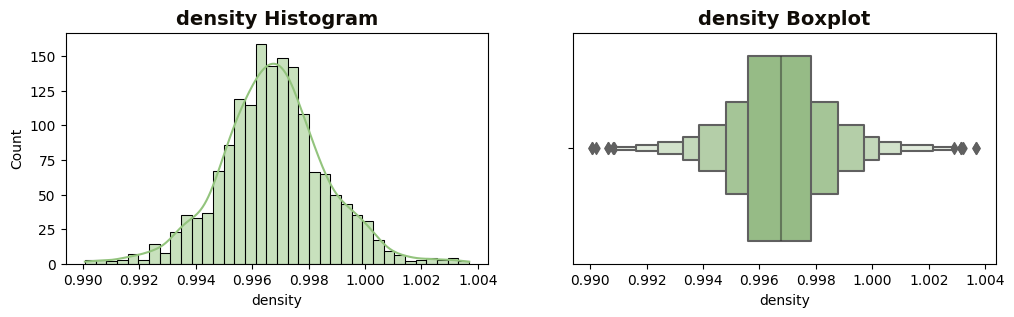



 Data Distribution : pH


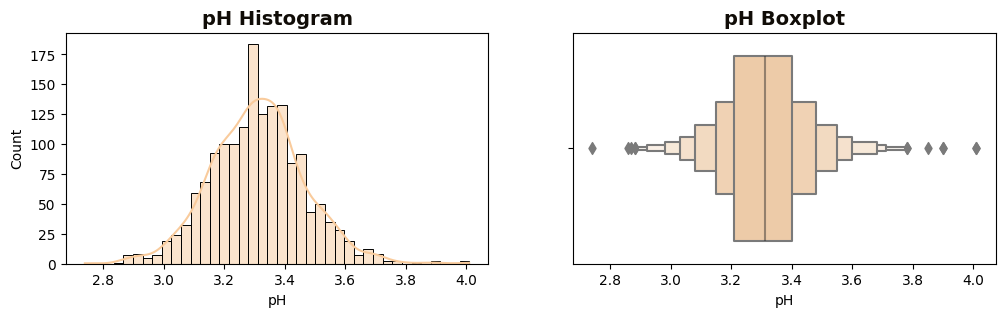



 Data Distribution : sulphates


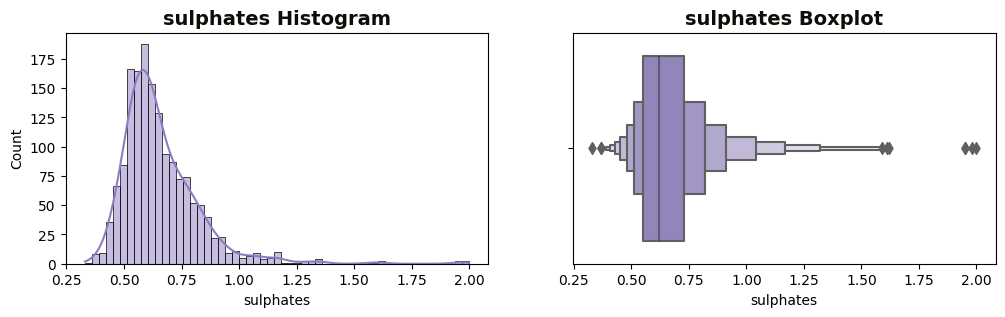



 Data Distribution : alcohol


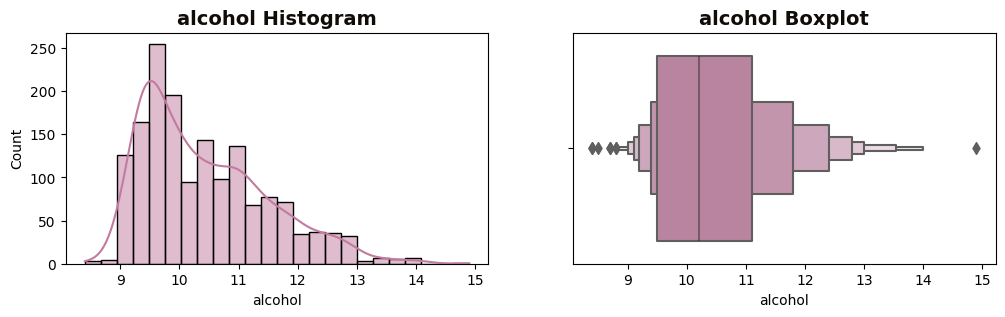

In [11]:
# Features
for color, column in enumerate(data_original.columns):
  if column == 'quality':
    continue
  else:
    print(f'\033[93m\033[1m Data Distribution : {column}\033[0m')
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 2, 1)
    plt.title(f'{column} Histogram', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_palette[0])
    sns.histplot(data_original[column], kde=True, color = color_palette[color])
    plt.subplot(1, 2, 2)
    plt.title(f'{column} Boxplot', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_palette[0])
    sns.boxenplot(data=data_original, x=column, color = color_palette[color])
    plt.show()
    print('\n')

Findings
- There appears to be extreme outliers on residual sugar and chlorides columns.
- Few outliers observerd in sulphates column.
- There are no negative values in the feature columns.
- Most of the feature columns have normal like distributions.
- Other columns are right skewed.


<div style="background-color: #FF6961; padding: 10px; border-radius: 5px;">
    <span style="color: white; font-size: 22px; font-weight: bold;">5.2.2 | Feature Variables
</span>
</div>

In [12]:
# --- Skewness of Continuous Variables ---
print('\033[93m\033[1m'+'Columns Skewness :'+'\033[0m')

data_original.skew(axis = 0, skipna = True)

Columns Skewness :


fixed acidity          0.98
volatile acidity       0.67
citric acid            0.32
residual sugar         4.54
chlorides              5.68
free sulfur dioxide    1.25
total sulfur dioxide   1.52
density                0.07
pH                     0.19
sulphates              2.43
alcohol                0.86
quality                0.22
dtype: float64

residual sugar (4.540655): High positive skew. The distribution is highly stretched on the right, indicating a significant number of higher-than-average values.

chlorides (5.680347): Very high positive skew. The distribution has a very long right tail, suggesting outliers or a wide variation in the larger values.

free sulfur dioxide (1.250567): Moderate positive skew. The distribution has a longer right tail, indicating some higher values.

total sulfur dioxide (1.515531): Moderate positive skew. The distribution is stretched on the right, suggesting some higher values.

sulphates (2.428672): Moderate to high positive skew. The distribution has a longer right tail, suggesting the presence of high outliers.

In [13]:
# --- Skewness of Continuous Variables ---
print('\033[93m\033[1m'+'Columns Kurtosis :'+'\033[0m')

data_original.kurt(axis = 0, skipna = True)

Columns Kurtosis :


fixed acidity           1.13
volatile acidity        1.23
citric acid            -0.79
residual sugar         28.62
chlorides              41.72
free sulfur dioxide     2.02
total sulfur dioxide    3.81
density                 0.93
pH                      0.81
sulphates              11.72
alcohol                 0.20
quality                 0.30
dtype: float64


residual sugar (28.617595): Highly leptokurtic. The distribution has very heavy tails and likely contains extreme outliers.

chlorides (41.715787): Extremely leptokurtic. This suggests a significant presence of extreme outliers.

free sulfur dioxide (2.023562): Leptokurtic. The distribution has heavier tails than a normal distribution.

total sulfur dioxide (3.809824): Leptokurtic. It has heavier tails and might contain outliers.

sulphates (11.720251): Highly leptokurtic. The distribution has very heavy tails and a sharp peak, suggesting outliers.

<div style="background-color: #FF6961; padding: 10px; border-radius: 5px;">
    <span style="color: white; font-size: 28px; font-weight: bold;">6 | Exploratory Data Analysis
</span>
</div>


In [14]:
data = data_original.copy()

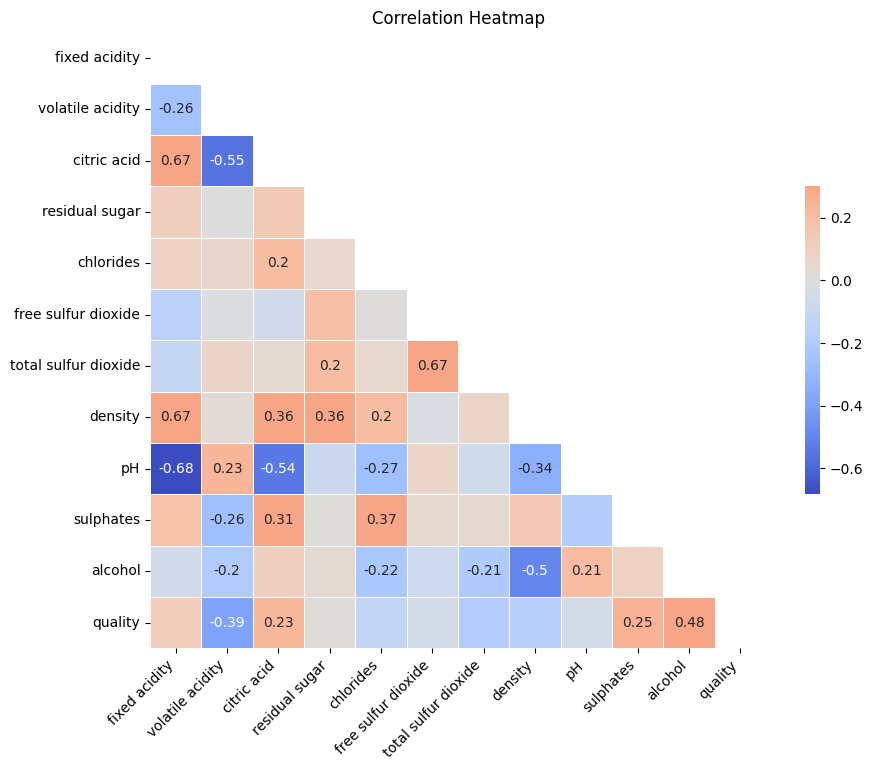

In [15]:
# Calculating the correlation matrix for numerical data
correlation_matrix = data.corr(numeric_only=True)

# Creating a mask to display only the lower triangle of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Setting up the matplotlib figure with specified size
plt.figure(figsize=(10, 8))

# Creating a mask for displaying annotations only for significant correlations (|correlation| >= 0.2)
annot_mask = (correlation_matrix <= -0.2) | (correlation_matrix >= 0.2)

# Custom annotations: display correlation values for significant correlations, leave others blank
annot_text = np.where(annot_mask, correlation_matrix.round(2).astype(str), '')

# Drawing the heatmap with the specified properties
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=annot_text, fmt='')

# Adjusting plot elements for better readability
plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha='right')

plt.show()


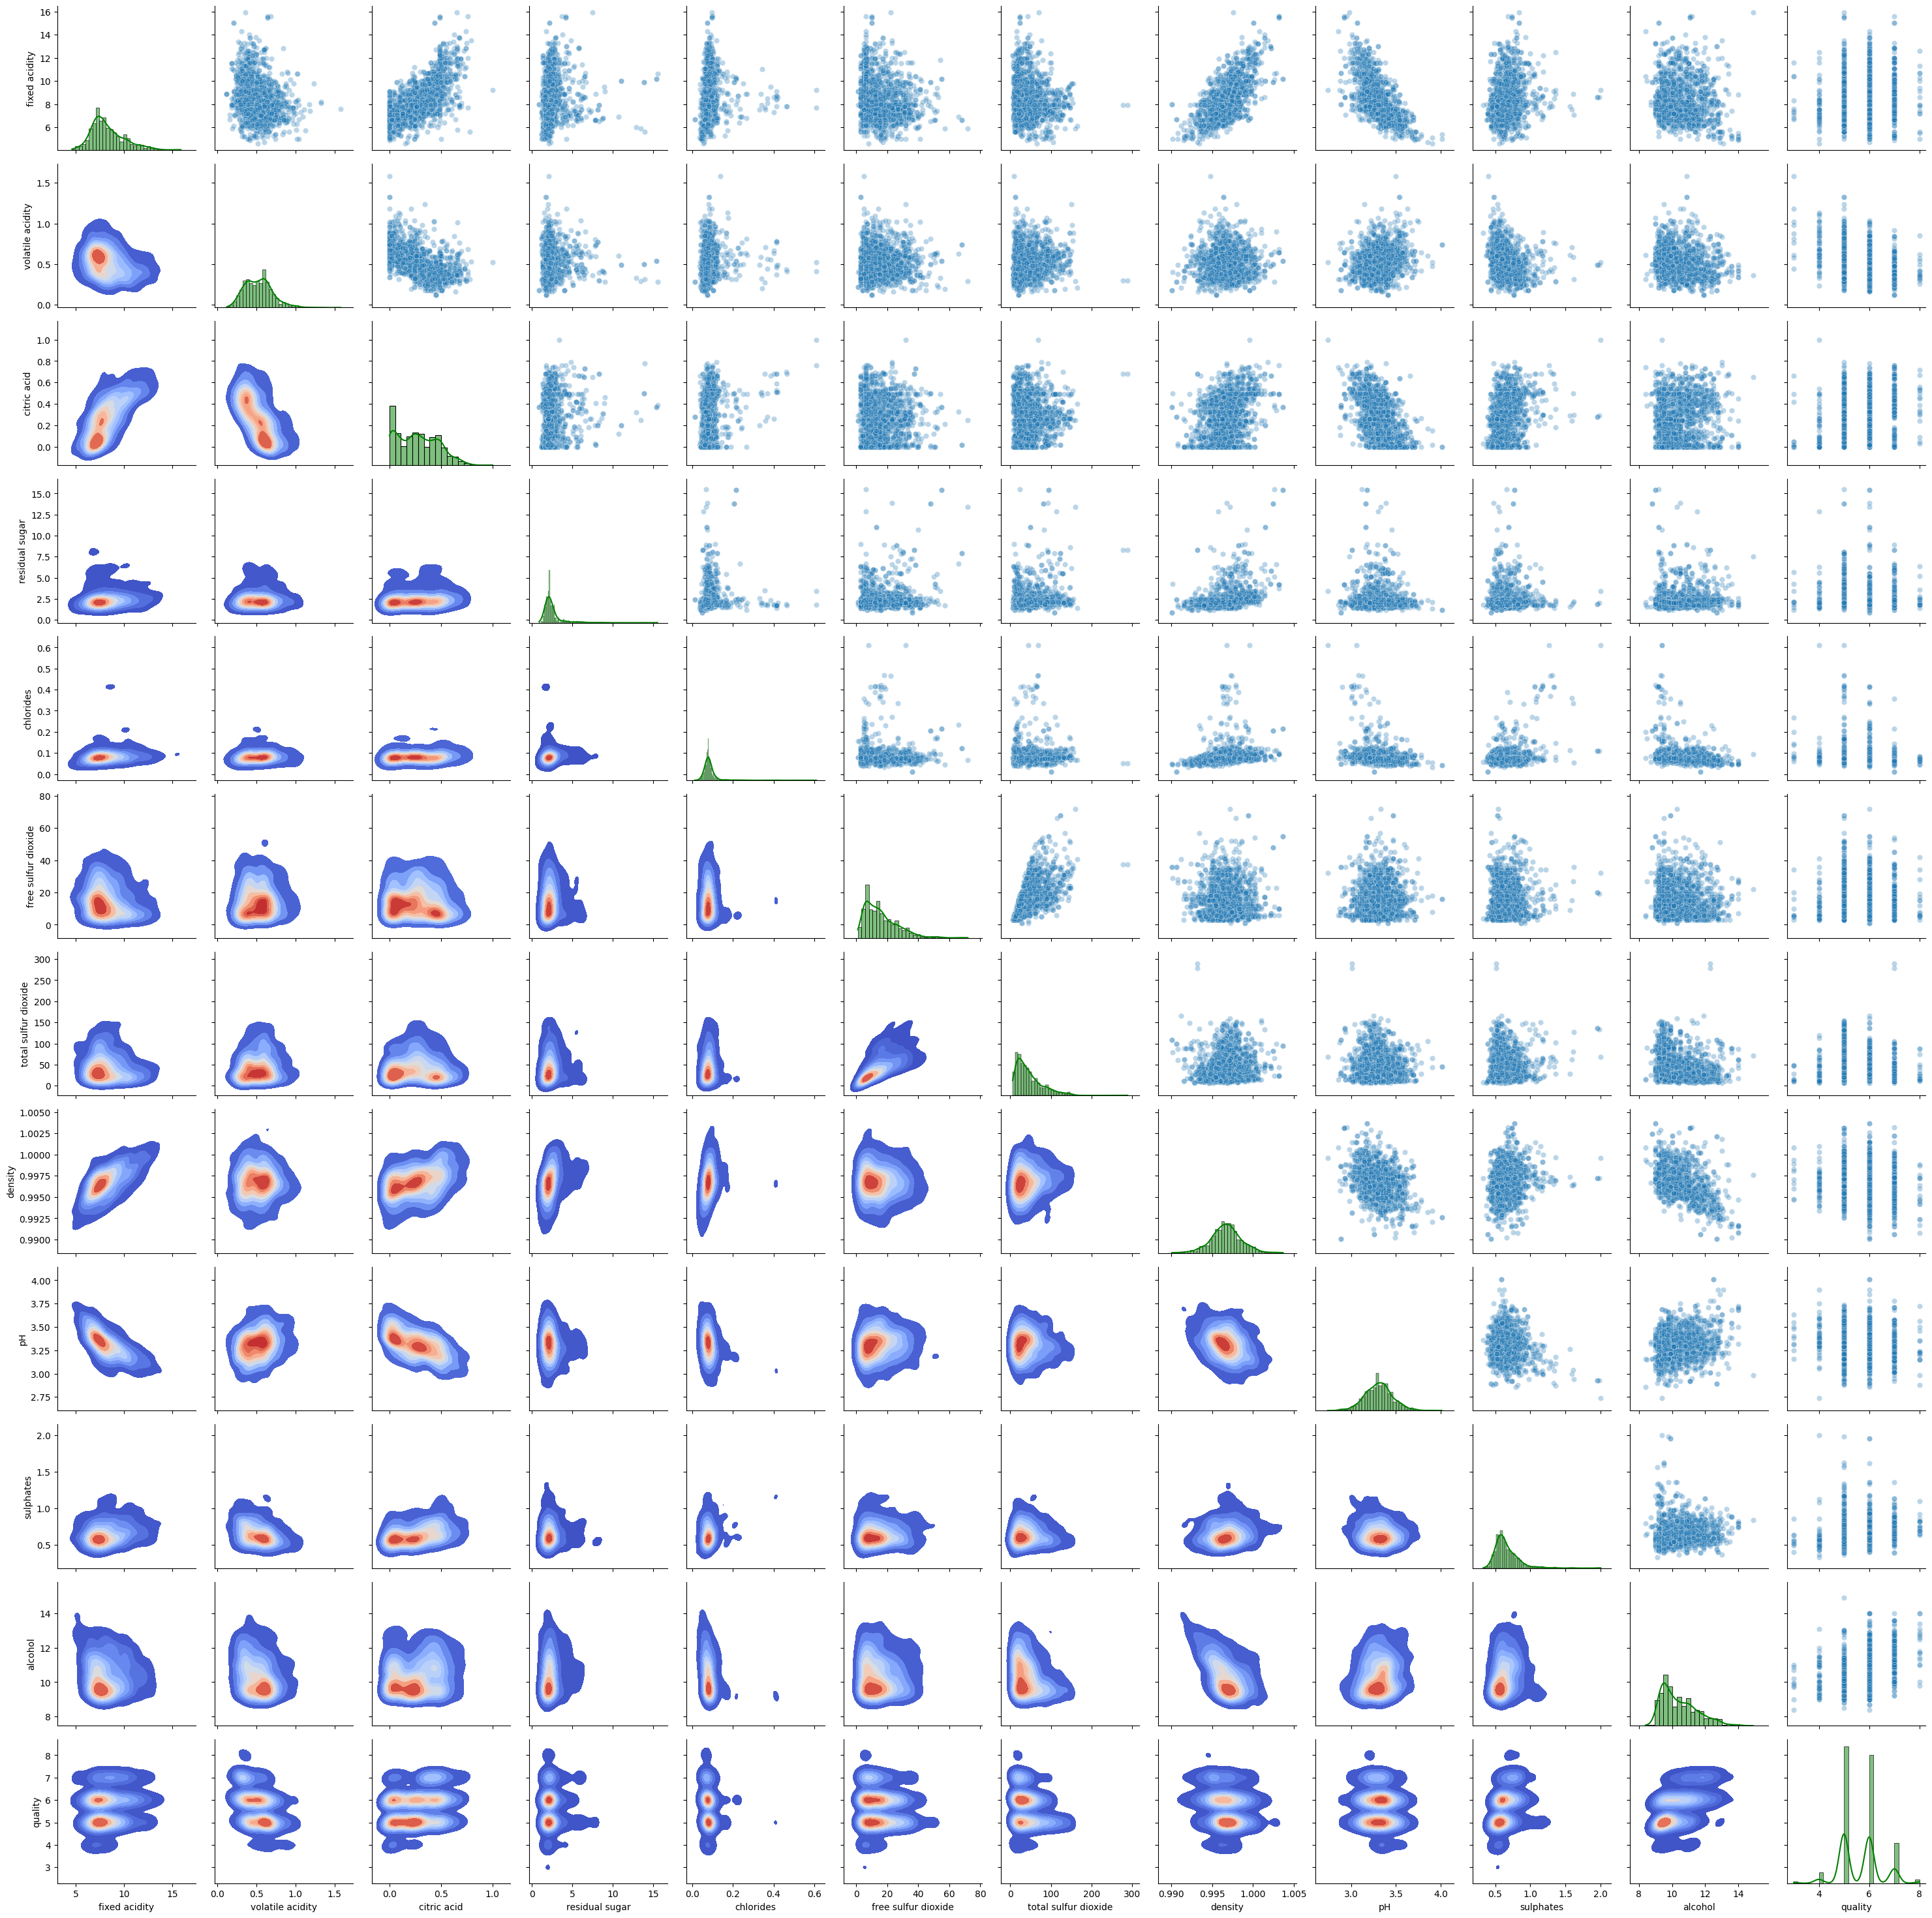

In [16]:
import seaborn as sns
# Creating a PairGrid to visualize pairwise relationships in the dataset
g = sns.PairGrid(data)

# Mapping different types of plots to sections of the PairGrid
g.map_upper(sns.scatterplot, palette='darkblue', alpha=0.3)          # Histograms in the upper triangle
g.map_diag(sns.histplot, kde=True, color='green')   # Histogram with KDE overlay on the diagonal
g.map_lower(sns.kdeplot, fill=True, cmap='coolwarm') # KDE in the lower triangle with color map

In [17]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

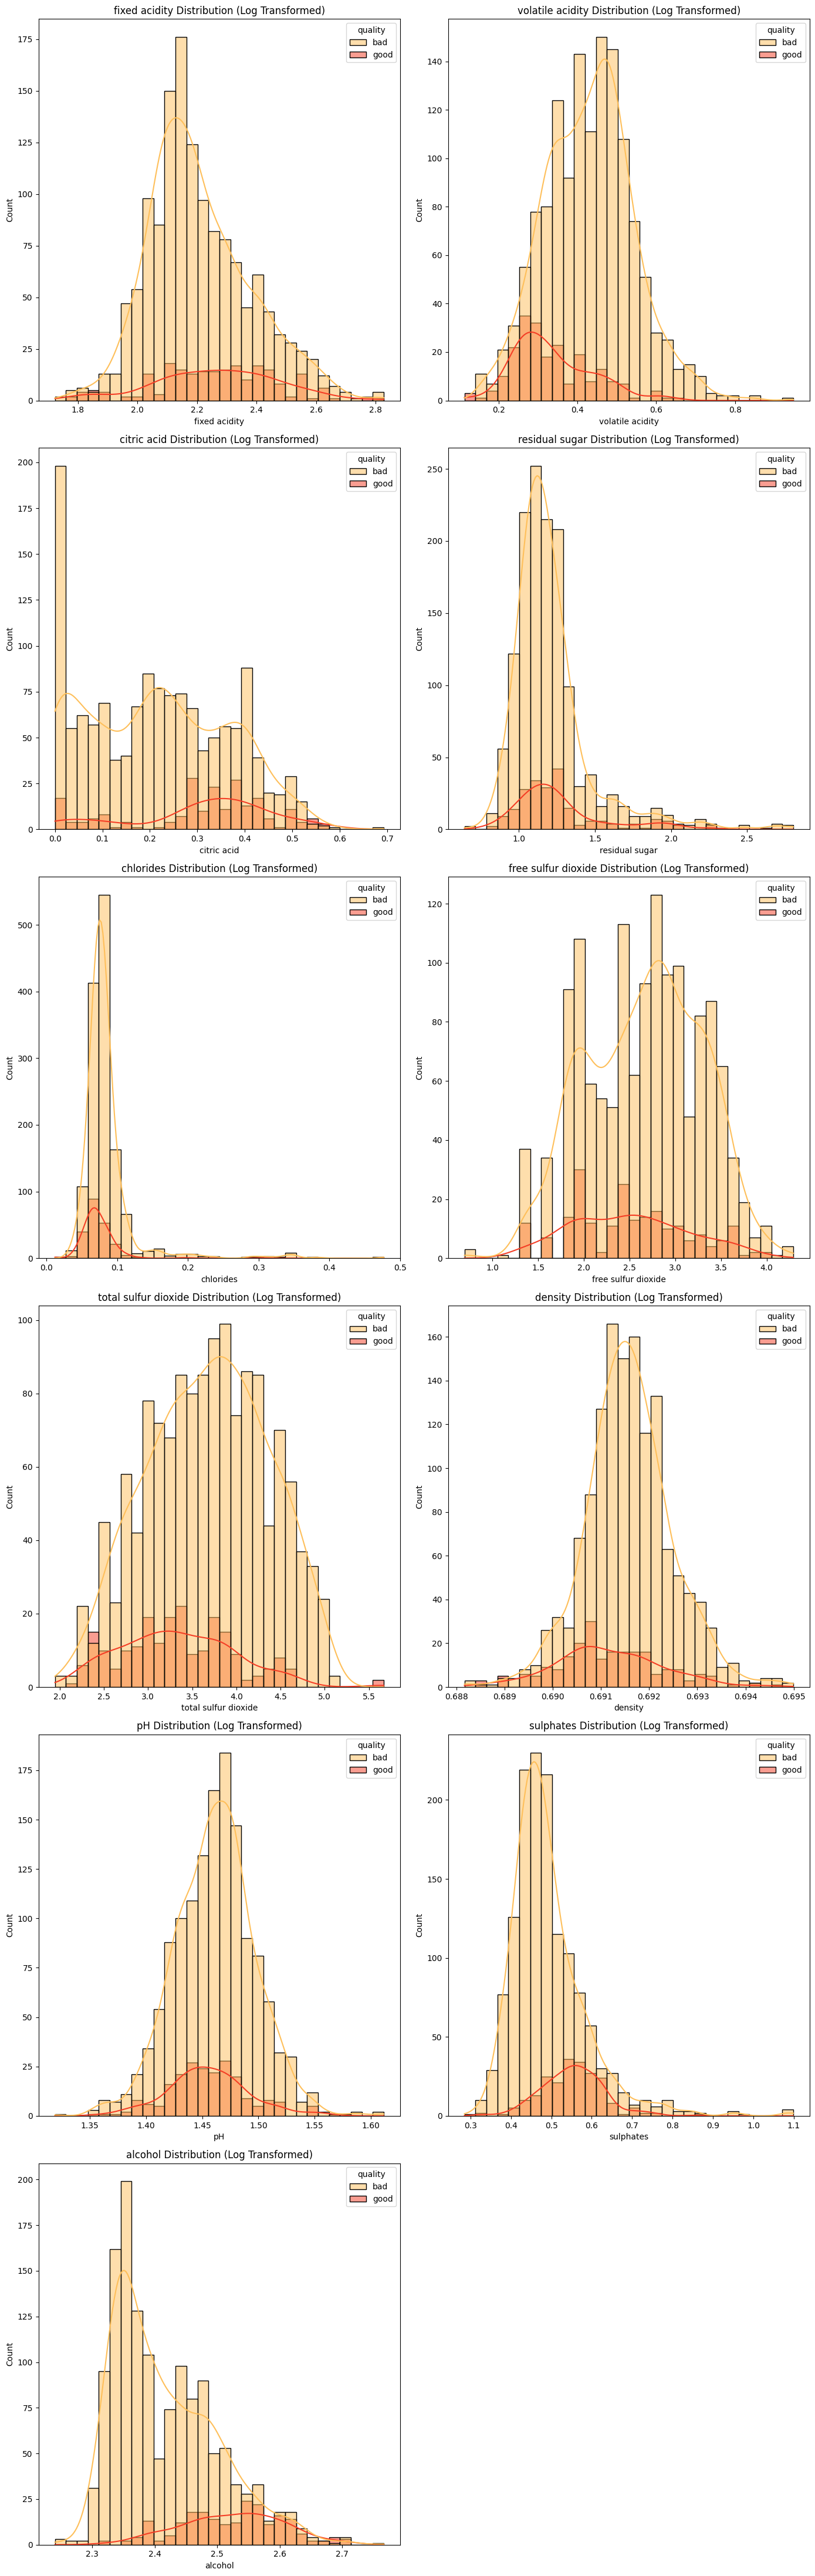

In [18]:
num_variables = data.select_dtypes(include=[np.number]).columns.tolist()

# log transform
for col in num_variables:
    data[col] = data[col].apply(lambda x: np.log(x+1))

# adjust the size of graph
plt.figure(figsize=(14, len(num_variables)*4))

for idx, column in enumerate(num_variables):
    plt.subplot(len(num_variables)//2 + len(num_variables)%2, 2, idx+1)
    sns.histplot(x=column, hue="quality", data=data, bins=30, kde=True, palette='YlOrRd')
    plt.title(f"{column} Distribution (Log Transformed)")
    plt.tight_layout()

plt.show()

<div style="background-color: #FF6961; padding: 10px; border-radius: 5px;">
    <span style="color: white; font-size: 28px; font-weight: bold;">7 | Feature Engineering
</span>
</div>


**Acidity Interaction Terms:**

Total Acidity: While you have 'fixed acidity' and 'volatile acidity' separately, the total acidity (sum of both) may have a different relationship with quality.

Acid Balance Ratio: The ratio of 'fixed acidity' to 'volatile acidity' can be a feature, as a balance between the two might be desirable.


**Sugar and Alcohol Interaction:**

Residual Sugar to Alcohol Ratio: Sweeter wines might have a different balance of alcohol and sugar that could correlate with quality.


**Sulfur Dioxide Ratios:**

Free to Total Sulfur Dioxide Ratio: The proportion of 'free sulfur dioxide' to 'total sulfur dioxide' can affect antioxidant and antibacterial properties, potentially affecting quality.


**Sulfur Dioxide and Sugar Interaction:**

For sweeter wines, the level of sulfur dioxide might need to be higher to prevent fermentation and spoilage. An interaction term between 'residual sugar' and sulfur dioxide measures could be informative.


**pH and Acidity Interaction:**
Since pH is a measure of acidity (but on a logarithmic scale), multiplying pH with the acidity measures might highlight their interaction effect.


**Concentration Ratios:**

Ratios of 'chlorides', 'sulphates', 'alcohol' 'residual sugar' and 'total acidity' to 'density' might give a more standardized measure of concentration that could correlate with quality.


**Chemical Interactions:**

Interaction terms between 'citric acid', 'sulphates', and 'chlorides', since these may work together to influence flavor and preservation.

In [19]:
new_features = pd.DataFrame()

In [23]:
new_features['total_acidity'] = data['fixed acidity'] + data['volatile acidity']
new_features['acid_balance'] = data['fixed acidity'] / data['volatile acidity']
new_features['suger_alcohol_balance']  = data['residual sugar'] / data['alcohol']
new_features['sulfur_ratio'] = data['free sulfur dioxide'] / data['total sulfur dioxide']
new_features['sulfur_sugar_diff'] = data['total sulfur dioxide'] - data['residual sugar']
new_features['ph_acidity'] = data['pH'] * new_features['total_acidity']
new_features['con_chlorides'] = data['chlorides'] / data['density']
new_features['con_sulphates'] = data['sulphates'] / data['density']
new_features['con_alcohol'] = data['alcohol'] / data['density']
new_features['con_total_acidity'] = new_features['total_acidity'] / data['density']
new_features['con_residual_sugar'] = data['residual sugar'] / data['density']
new_features['chem_citric_sulph'] = data['citric acid'] * data['sulphates']
new_features['chem_citric_chlor'] = data['citric acid'] * data['chlorides']
new_features['chem_sulph_chlor'] = data['sulphates'] * data['chlorides']
new_features['quality'] = data_original['quality']

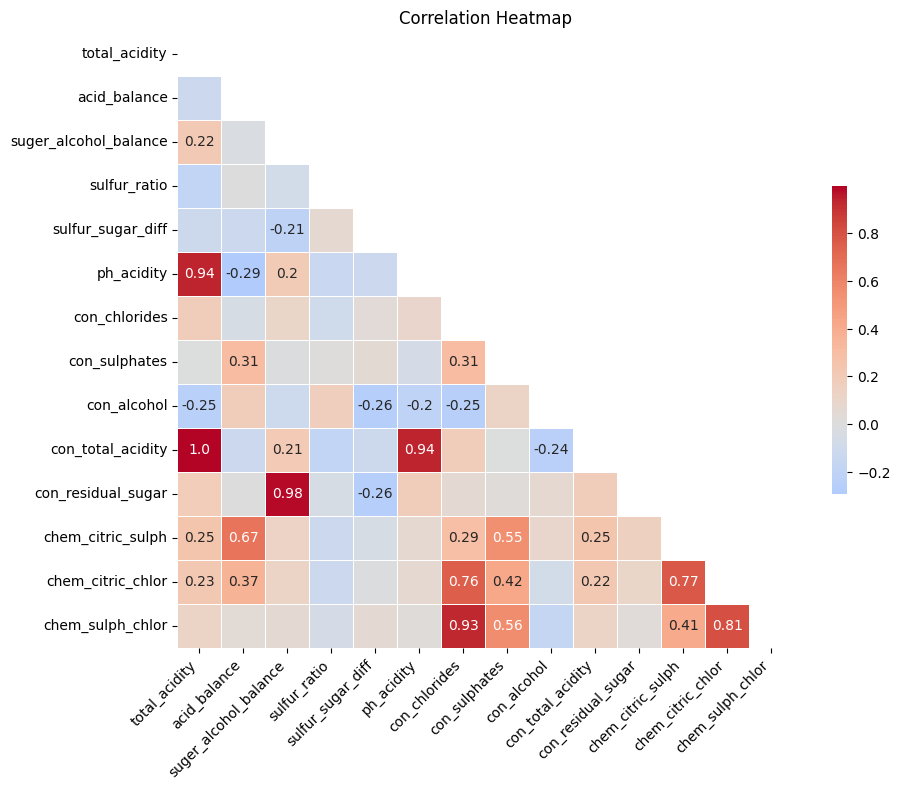

In [42]:
# Calculating the correlation matrix for numerical data
correlation_matrix = new_features.corr(numeric_only=True)

# Creating a mask to display only the lower triangle of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Setting up the matplotlib figure with specified size
plt.figure(figsize=(10, 8))

# Creating a mask for displaying annotations only for significant correlations (|correlation| >= 0.2)
annot_mask = (correlation_matrix <= -0.2) | (correlation_matrix >= 0.2)

# Custom annotations: display correlation values for significant correlations, leave others blank
annot_text = np.where(annot_mask, correlation_matrix.round(2).astype(str), '')

# Drawing the heatmap with the specified properties
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=annot_text, fmt='')

# Adjusting plot elements for better readability
plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha='right')

plt.show()


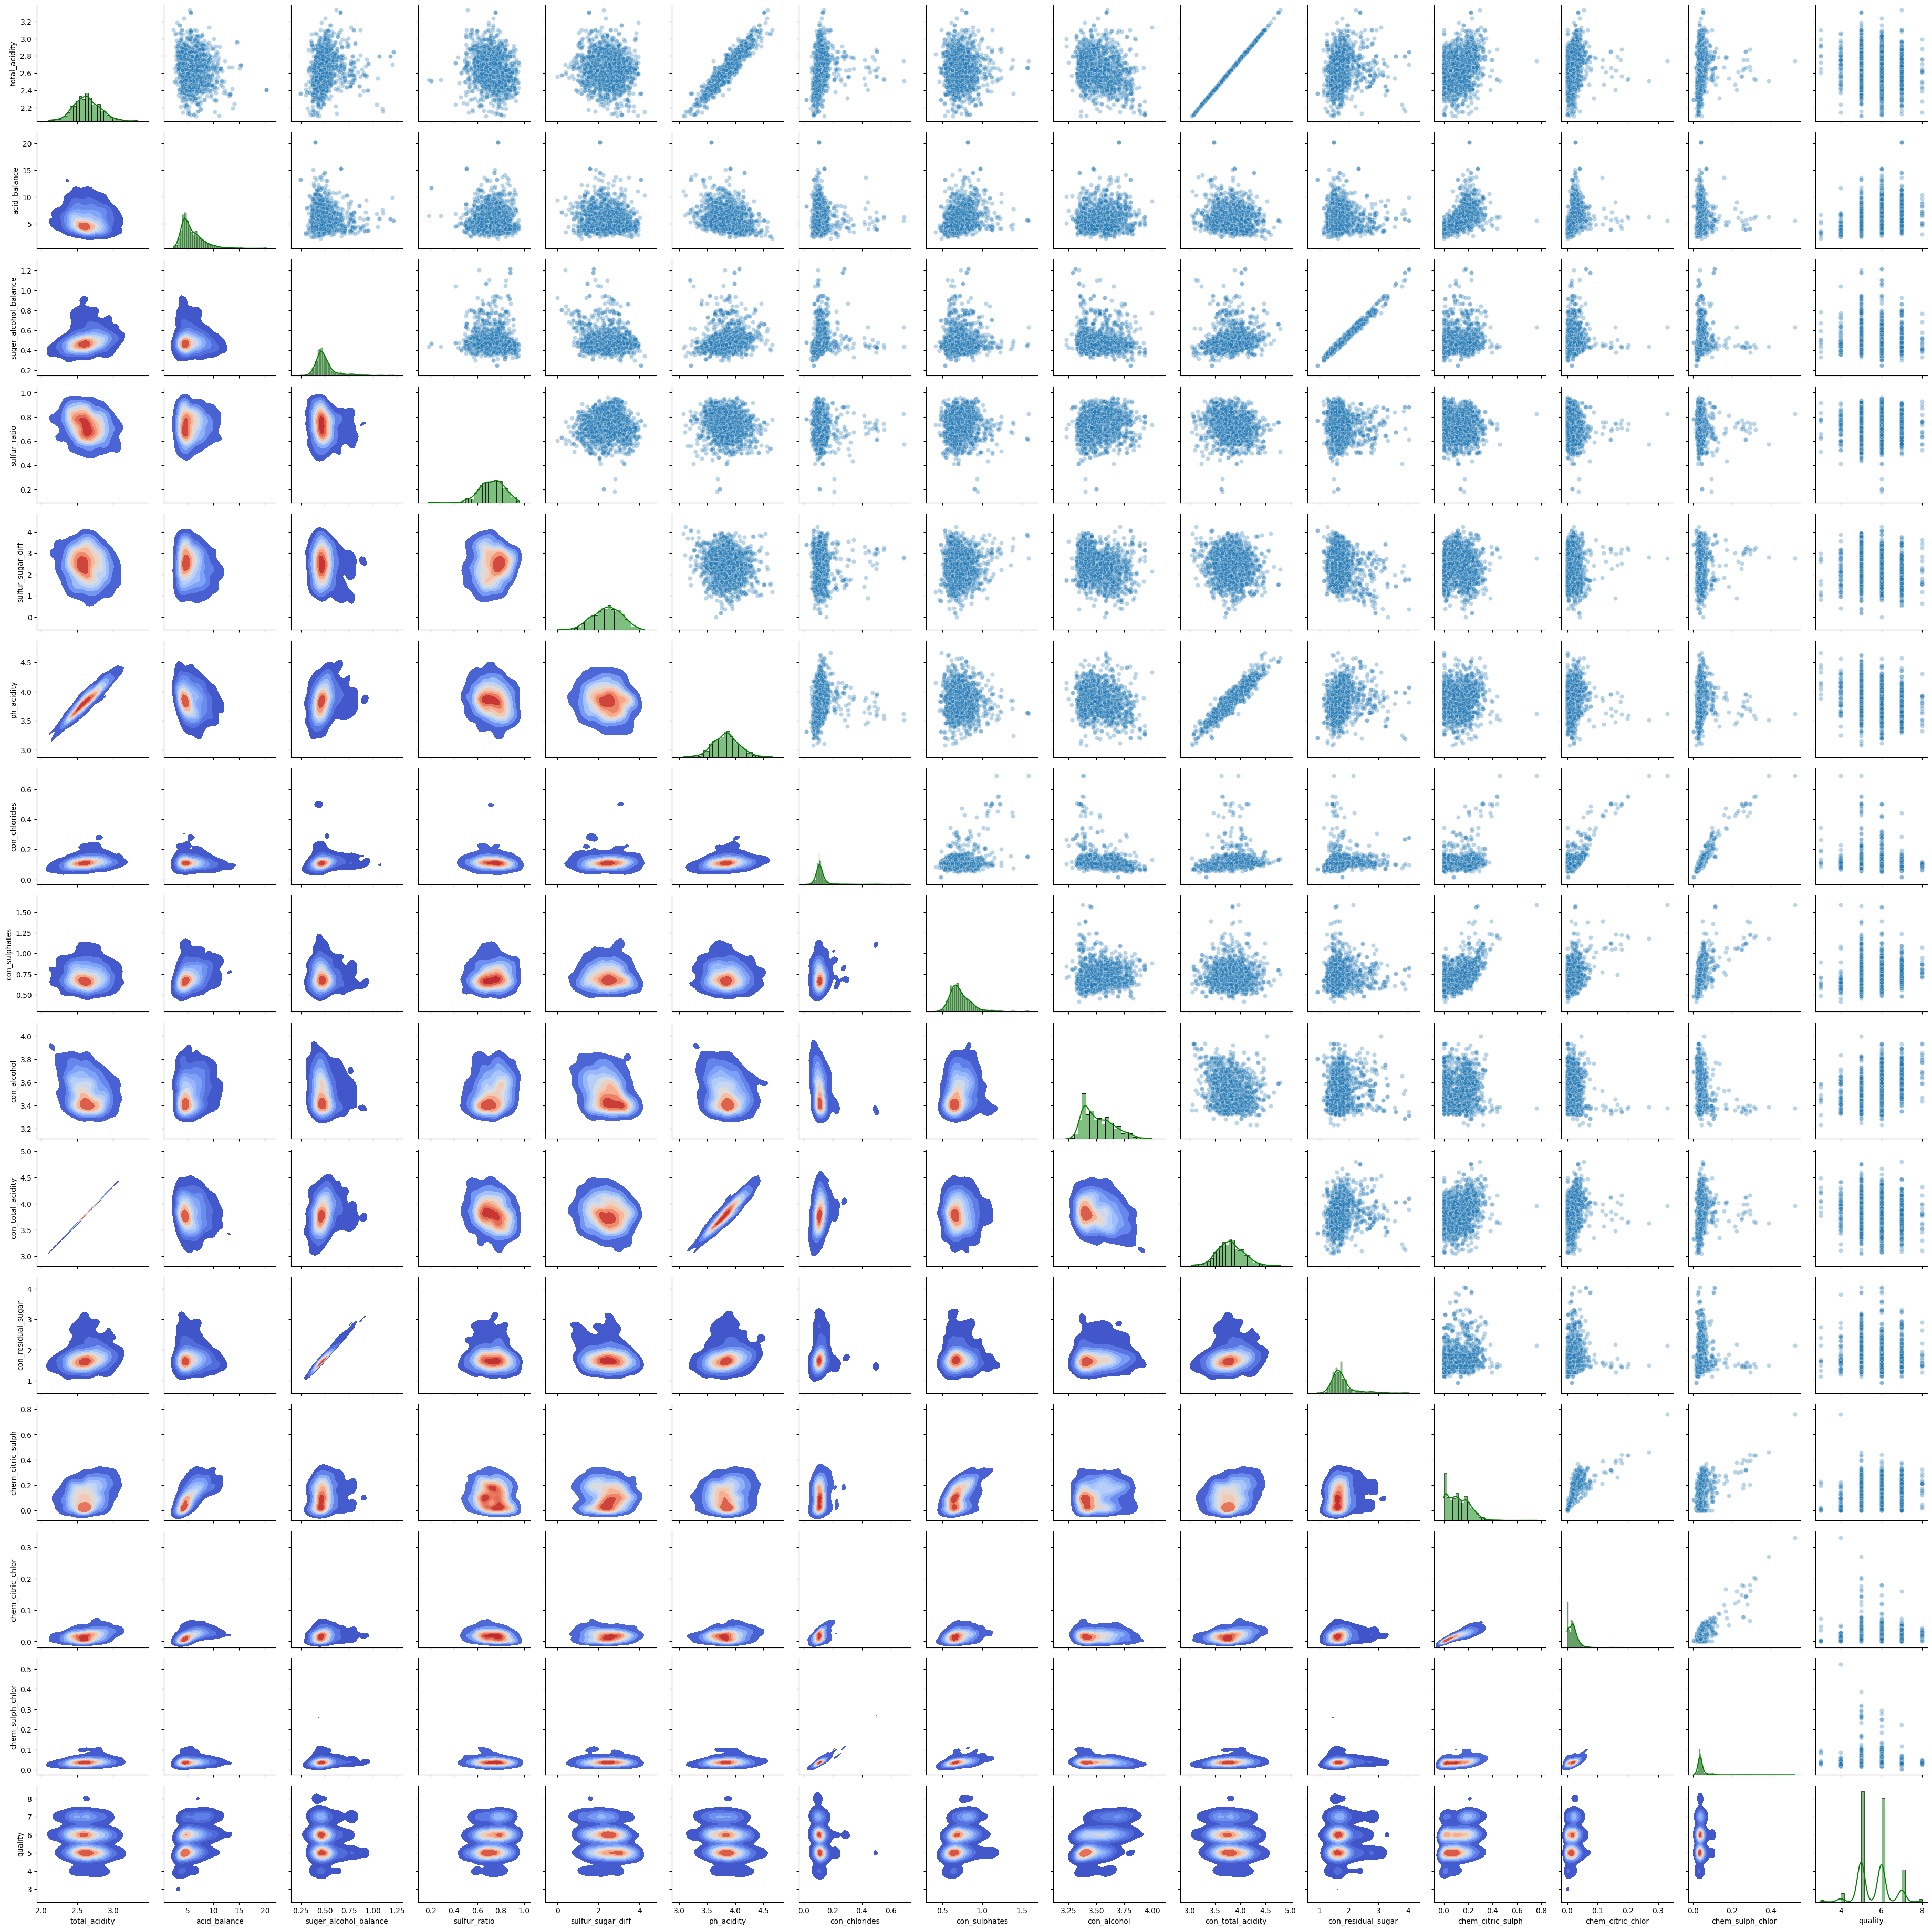

In [25]:
# Creating a PairGrid to visualize pairwise relationships in the dataset
g = sns.PairGrid(new_features)

# Mapping different types of plots to sections of the PairGrid
g.map_upper(sns.scatterplot, palette='darkblue', alpha=0.3)          # Histograms in the upper triangle
g.map_diag(sns.histplot, kde=True, color='green')   # Histogram with KDE overlay on the diagonal
g.map_lower(sns.kdeplot, fill=True, cmap='coolwarm') # KDE in the lower triangle with color map

In [26]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
new_features['quality'] = pd.cut(new_features['quality'], bins = bins, labels = group_names)

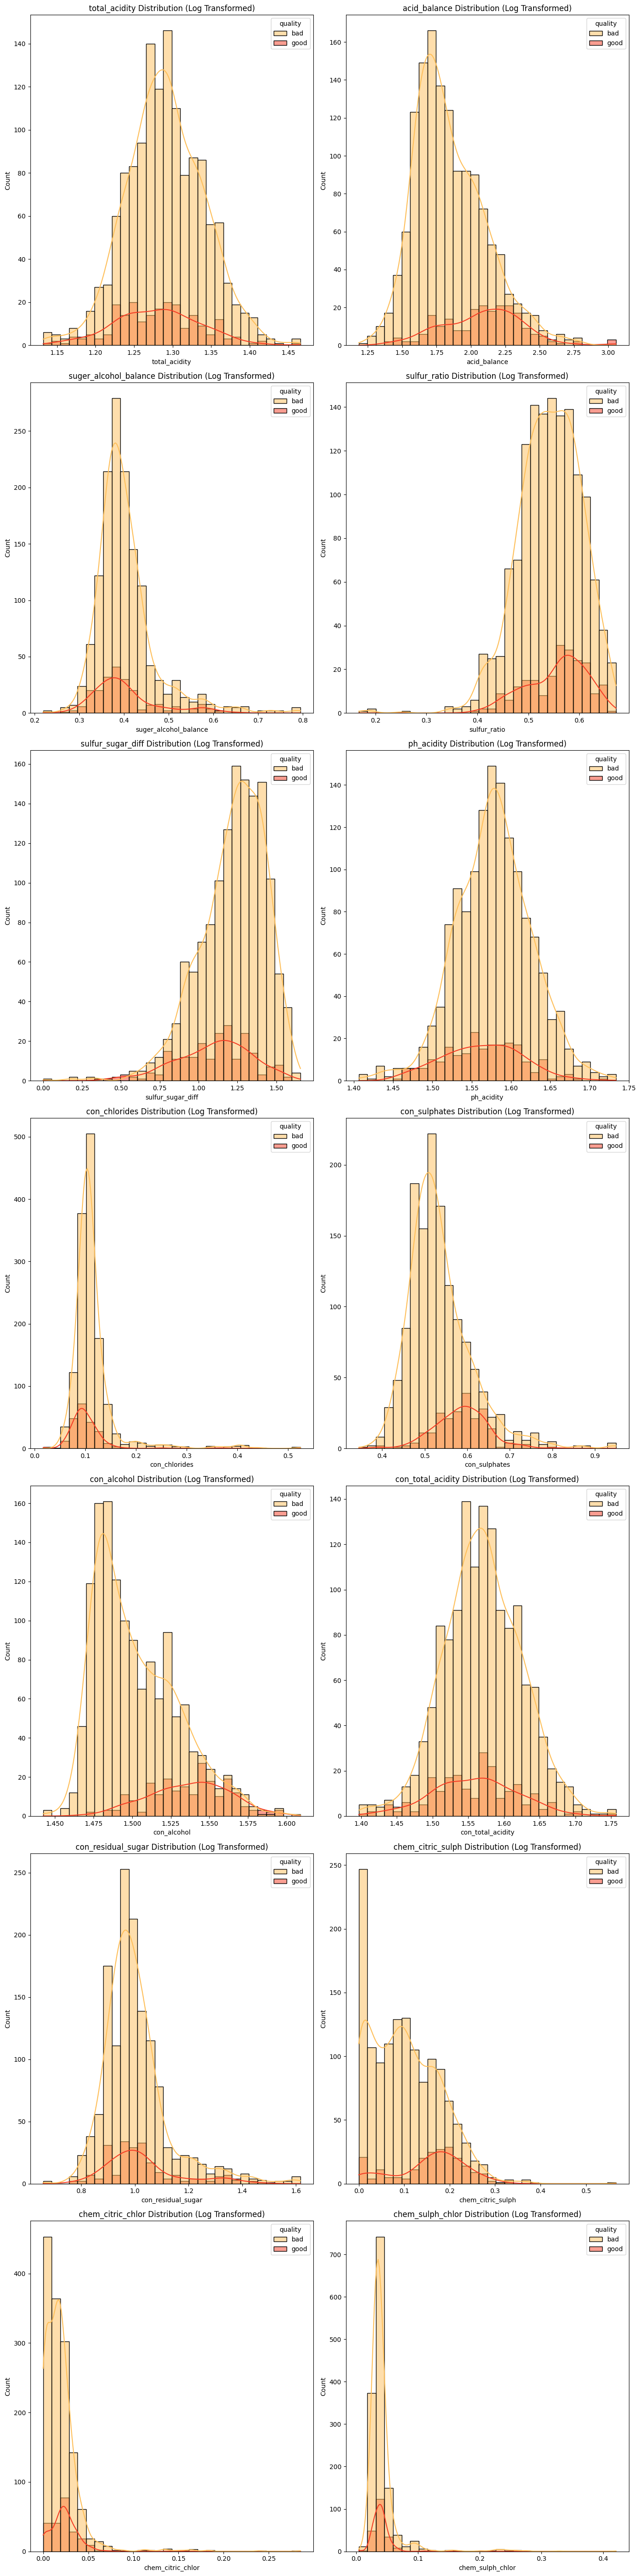

In [27]:
num_variables = new_features.select_dtypes(include=[np.number]).columns.tolist()

# log transform
for col in num_variables:
    new_features[col] = new_features[col].apply(lambda x: np.log(x+1))

# adjust the size of graph
plt.figure(figsize=(14, len(num_variables)*4))

for idx, column in enumerate(num_variables):
    plt.subplot(len(num_variables)//2 + len(num_variables)%2, 2, idx+1)
    sns.histplot(x=column, hue="quality", data=new_features, bins=30, kde=True, palette='YlOrRd')
    plt.title(f"{column} Distribution (Log Transformed)")
    plt.tight_layout()

plt.show()

<div style="background-color: #FF6961; padding: 10px; border-radius: 5px;">
    <span style="color: white; font-size: 28px; font-weight: bold;">8 | Conclusions
</span>
</div>

The following conclusions are derived from data analyzed using logarithmic scaling, which provides a more nuanced understanding of the relationships between various chemical properties and wine quality.

In conclusion, our Exploratory Data Analysis (EDA) of the wine dataset highlights distinct chemical characteristics between wines of good and bad quality


These insights underscore the complexity of wine composition and its impact on quality. Understanding these nuances can be instrumental for winemakers and enthusiasts in discerning and improving the quality of wine.

**Findings:**

1) Volatile Acidity: Good quality wines typically displayed volatile acidity levels between 0.2 to 0.3, while lower quality wines ranged mostly from 0.3 to 0.5, indicating a significant inverse relationship between volatile acidity and wine quality.

2) Citric Acid: Although citric acid distribution seemed uniformly spread across the dataset, good quality wines were more commonly observed to have citric acid levels in the range of 0.3 to 0.4.

3) Total Sulfur Dioxide: The total sulfur dioxide levels in good quality wines tended to be slightly lower than those in bad quality wines, with an average level of around 3.25 compared to approximately 3.75 for the latter.

4) Density: We noted a slightly lower density in good quality wines compared to bad quality wines, suggesting a nuanced difference in the concentration of various components.

5) Sulphates: The sulphates concentration in good quality wines was generally observed around 0.55 to 0.6, while it was between 0.4 to 0.55 for lower quality wines, pointing to a potential link between sulphates concentration and wine quality.

6) Alcohol: The alcohol concentration was significantly higher in good quality wines, typically between 0.5 to 0.6, as opposed to 2.3 to 2.5 in lower quality wines.

7) Concentration Ratios:

Optimal Sulphate Concentration: The optimal concentration of sulphates for good quality wines was observed to be around 0.6, compared to around 0.5 for lower quality wines.

Optimal Alcohol Concentration: The optimal concentration of alcohol was noted to be around 1.525 to 1.560 for good quality wines, whereas it was between 1.450 to 1.500 for most of the lower quality wines.

Ratios of constituents like chlorides, sulphates, alcohol, residual sugar, and total acidity to density were explored. Good quality wines exhibited more balanced and optimal concentration ratios compared to lower quality wines, emphasizing the importance of these ratios in assessing wine quality.



8) Chemical Interactions:

Interaction terms between citric acid, sulphates, and chlorides were analyzed.

The ideal chemical interaction between citric acid and sulphates for good quality wines was around 0.2, whereas it reached up to 0.2 for lower quality wines.

Good quality wines showed more favorable interaction profiles, suggesting that the synergistic effect of these chemicals might play a significant role in enhancing flavor and preservation.
